In [1]:
from sympy import *
from sympy.polys import *
init_session()

from sympy.plotting import plot
%matplotlib inline

IPython console for SymPy 1.14.0 (Python 3.13.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.14.0/



In [43]:
def inner_prod(f, g, var, a, b):
    # calculate the inner product between function f & g, independent variable var & in the interval [a,b]
    inner_fg = integrate(f * g, (var, a, b))
    return(inner_fg)

In [44]:
def project(f, g, var, a, b):
    # project function f onto g
    inner_fg = integrate(f * g, (var, a, b))
    inner_gg = integrate(g * g, (var, a, b))
    projection = simplify((inner_fg / inner_gg) * g)
    return projection

In [45]:
# dry run
f = x**2
g = x
proj = project(f, g, x, 0, 1)
print(proj)

3*x/4


In [46]:
proj = project(1, x, x, -1, 1)
print(proj)

0


In [47]:
def gram_schmidt(functions, var, a, b):
    # gram-schmidt for a list of functions
    orthogonal = []
    for f in functions:
        ortho_f = f
        for g in orthogonal:
            ortho_f -= project(f, g, var, a, b)
        orthogonal.append(simplify(ortho_f))
    return orthogonal

In [48]:
basis = [1, x, x**2, x**3]
orthogonal_basis = gram_schmidt(basis, x, -1, 1)

for i, u in enumerate(orthogonal_basis, start=1):
    print(f"u{i}(x) =", u)

u1(x) = 1
u2(x) = x
u3(x) = x**2 - 1/3
u4(x) = x*(x**2 - 3/5)


In [49]:
inner_prod(orthogonal_basis[0], orthogonal_basis[1], x, -1, 1), inner_prod(orthogonal_basis[0], orthogonal_basis[2], x, -1, 1), inner_prod(orthogonal_basis[1], orthogonal_basis[2], x, -1, 1)

Ok, so we have found an orthogonal basis => Let's compare with the legendre polynomials

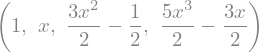

In [50]:
L0 = legendre_poly(0,x)
L1 = legendre_poly(1,x)
L2 = legendre_poly(2,x)
L3 = legendre_poly(3,x)
L0, L1, L2, L3

They are not equal, but differ just by a constant factor

In [54]:
simplify(orthogonal_basis[2] / L2)